<a href="https://colab.research.google.com/github/forodie/MachineLearning-Homework/blob/main/ML_SF_CRIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco Crime Classification

#  Описание задачи

В этом наборе данных представлены почти 12-летние отчеты о преступлениях во всех районах Сан-Франциско - от Сансета до SOMA, от Марины до Эксельсиора.

Задача состоит в "классификации преступности в Сан-Франциско".

Цели, стоящие перед организаторами конкурса, в котором предъявлен датасет:
1. Предсказать категорию преступления по имеющейся информации местоположения и времени.
2. Визуализировать данные: город и преступления.

Датасет имеет следующие переменные:
1. Dates - временная метка о преступлении
2. Category - категория преступления (только в обучающей выборке)
3. Descript - подробное описание преступления (только в обучающей выборке)
4. DayOfWeek - день недели
5. PdDistrict - название района, в котором расположен полицейский департамент
6. Resolution - описание разрешения конфликта (только в обучающей выборке)
7. Address - приблизительный адрес улицы, на котором произошло преступление
8. X - Долгота
9. Y - Широта

Некоторый комментарий к реализации:
Вся работа будет проходить с файлом train.csv. В дальнейшем его будем разбивать на обучающую и тестовую выборку. Поскольку классов 39, то некоторые по смыслу в дальнейшем определим в 5-6 классов.

# Чтение данных

In [1]:
# Необходимые библиотеки
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import defaultdict

In [2]:
# Загрузка данных
url = 'train.csv' # Файл с данными должен лежать в папке с проектом
data = pandas.read_csv(url)
data.shape

(878049, 9)

Датасет содержит информацию о 878049 объектах, имеющих 9 признаков, два из которых относятся к обучающей выборке.

In [3]:
data

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[878049 rows x 9 columns]

In [4]:
print(data.columns)
print(data.isnull().sum())

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


In [18]:
data['Category'] = data['Category'].astype('category')
data['Category'].dtype

CategoricalDtype(categories=['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
                  'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
                  'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
                  'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD',
                  'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS',
                  'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL',
                  'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION',
                  'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
                  'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
                  'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA',
                  'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS',
                  'WEAPON LAWS'],
, ordered=False)

In [6]:
data['Resolution'] = data['Resolution'].astype('category')
data['Resolution'].dtype

CategoricalDtype(categories=['ARREST, BOOKED', 'ARREST, CITED',
                  'CLEARED-CONTACT JUVENILE FOR MORE INFO',
                  'COMPLAINANT REFUSES TO PROSECUTE',
                  'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
                  'EXCEPTIONAL CLEARANCE', 'JUVENILE ADMONISHED',
                  'JUVENILE BOOKED', 'JUVENILE CITED', 'JUVENILE DIVERTED',
                  'LOCATED', 'NONE', 'NOT PROSECUTED',
                  'PROSECUTED BY OUTSIDE AGENCY',
                  'PROSECUTED FOR LESSER OFFENSE', 'PSYCHOPATHIC CASE',
                  'UNFOUNDED'],
, ordered=False)

In [7]:
data['Descript'] = data['Descript'].astype('category')
data['Descript'].dtype

CategoricalDtype(categories=['ABANDONMENT OF CHILD', 'ABORTION',
                  'ACCESS CARD INFORMATION, PUBLICATION OF',
                  'ACCESS CARD INFORMATION, THEFT OF', 'ACCIDENTAL BURNS',
                  'ACCIDENTAL SHOOTING', 'ACTS AGAINST PUBLIC TRANSIT',
                  'ADVERTISING DISTRIBUTORS PERMIT VIOLATION',
                  'AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF',
                  'AFFIXING ADVERTISMENTS TO POLES',
                  ...
                  'WEAPON, DEADLY, CARRYING WITH INTENT TO COMMIT ASSAULT',
                  'WEAPON, DEADLY, EXHIBITING TO RESIST ARREST',
                  'WEAPON, POSSESS OR BRING OTHER ON SCHOOL GROUNDS',
                  'WEAPON, POSSESSING IN PUBLIC BUILDING OR OPEN MEETING',
                  'WEAPON, TAKING OR ATTEMPTING TO TAKE FROM PEACE OFFICER',
                  'WEAPONS POSSESSION BY JUVENILE SUSPECT',
                  'WEARING MASK OR DISGUISE FOR UNLAWFUL PURPOSE',
                  'WEARING 

# Визуализация данных и вычисление основных характеристик

In [8]:
data.describe()

X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000

- count — количество значений для каждого признака
- mean — среднее значение
- std — стандартное отклонение, значение которого показывает, на сколько в среднем отклоняются варианты от среднего значения
- min — минимальное значение
- 25% — значения, которые объект не превышает с вероятностью 25%
- 50% — медиана, то есть значения, которые объект не превышает с вероятностью 25%
- 75% — значения, которые объект не превышает с вероятностью 75%
max — максимальное значение

In [9]:
data.describe(include=['category'])

Category                      Descript Resolution
count          878049                        878049     878049
unique             39                           879         17
top     LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO       NONE
freq           174900                         60022     526790

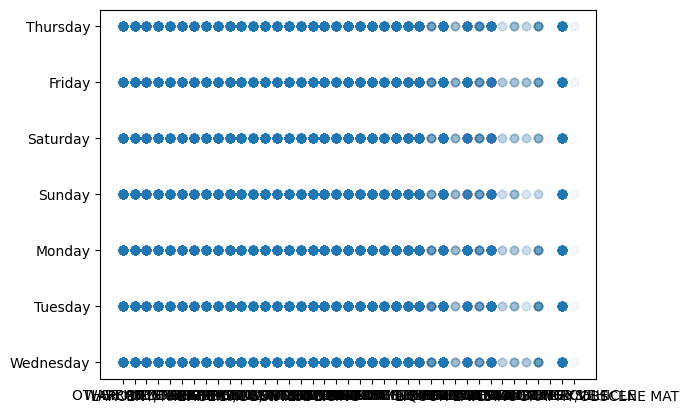

In [10]:
pyplot.scatter(data['Category'], data['DayOfWeek'], alpha=0.01)
pass

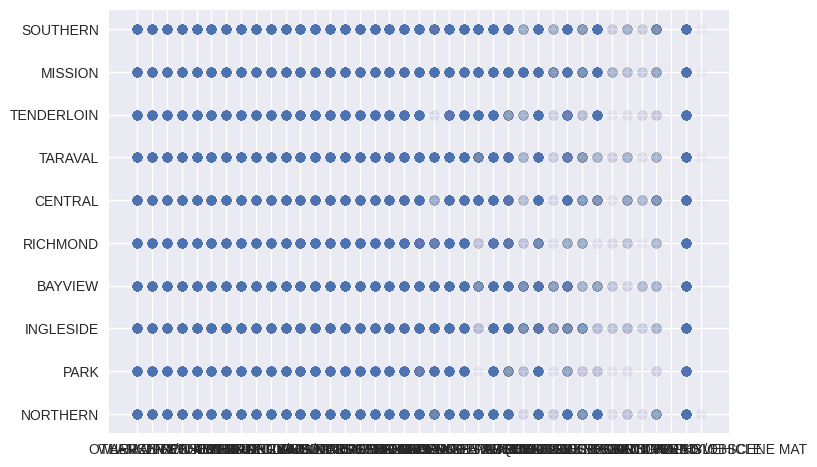

In [22]:
pyplot.scatter(data['Category'], data['PdDistrict'], alpha=0.01)
pass

<ipython-input-24-2d405204a5c0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  pyplot.style.use('seaborn')


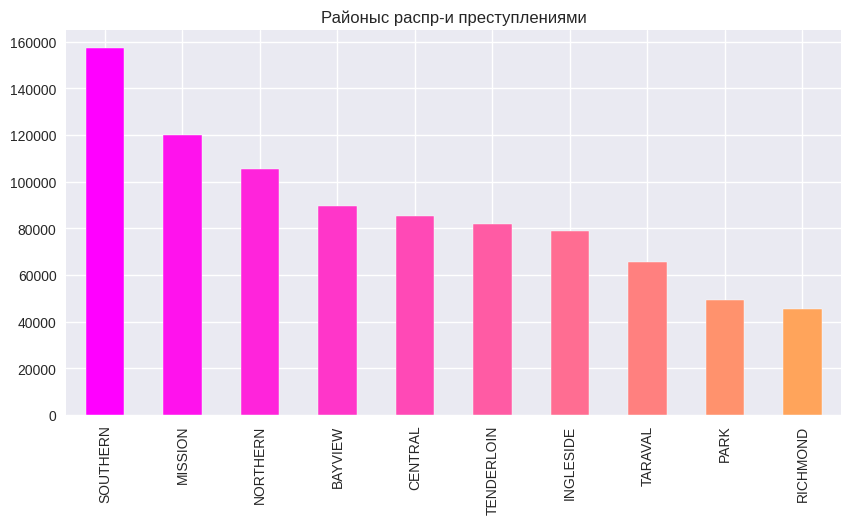

In [24]:
pyplot.rcParams['figure.figsize'] = (20, 9)
pyplot.style.use('seaborn')

color = pyplot.cm.spring(np.linspace(0, 1, 15))
data['PdDistrict'].value_counts().plot.bar(color = color, figsize = (10, 5))

pyplot.title('Районыс распр-и преступлениями',fontsize = 12)

pyplot.xticks(rotation = 90)
pyplot.show()

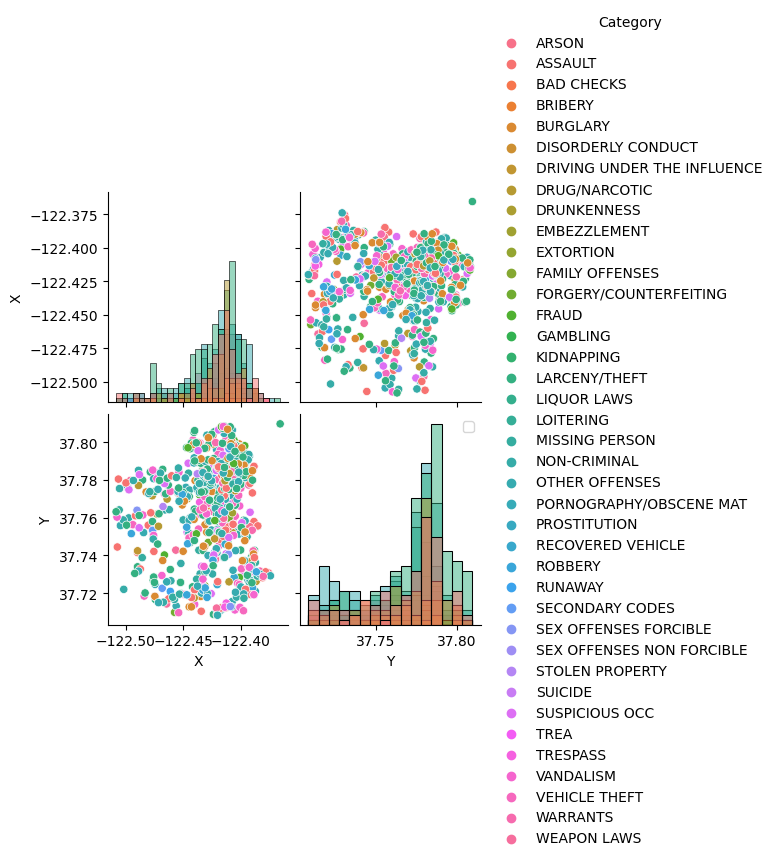

In [12]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
sns.pairplot(data.iloc[random_subset], hue='Category', diag_kind='hist')
pyplot.legend()
pass

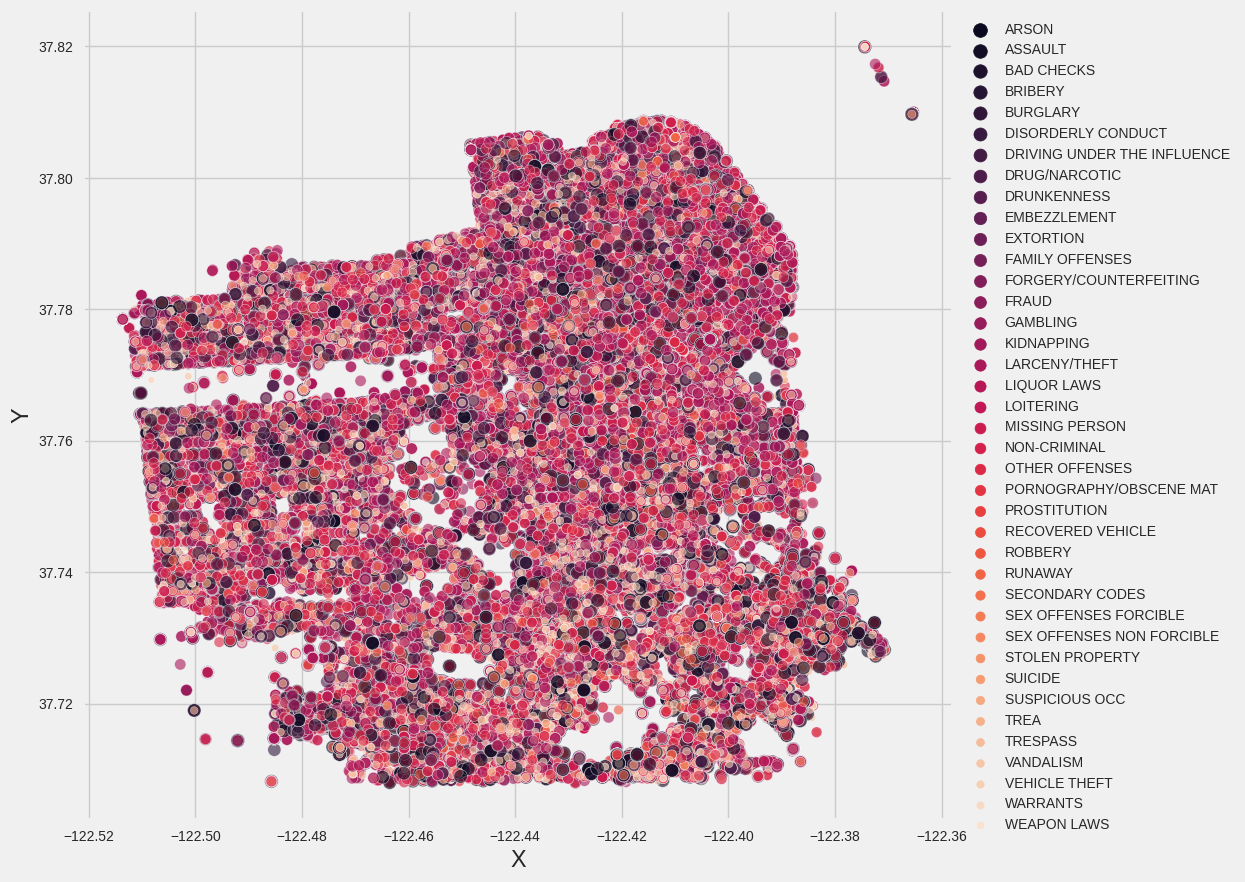

In [26]:
with pyplot.style.context('fivethirtyeight'):
    fig, ax = pyplot.subplots(1, 1, figsize=(10, 10))
    sns.scatterplot(data = data.iloc[:250000], x='X', y='Y', alpha=0.6, palette='rocket', hue='Category', size='Category')
    pyplot.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')

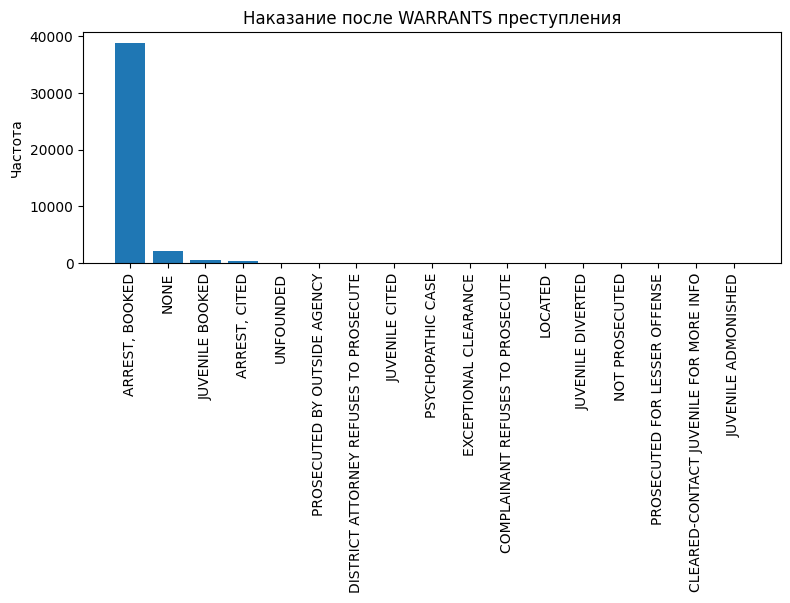

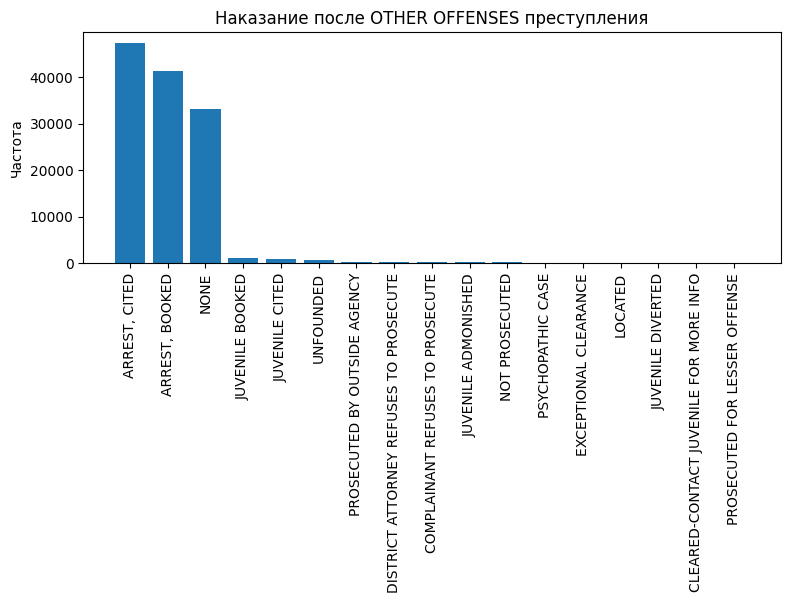

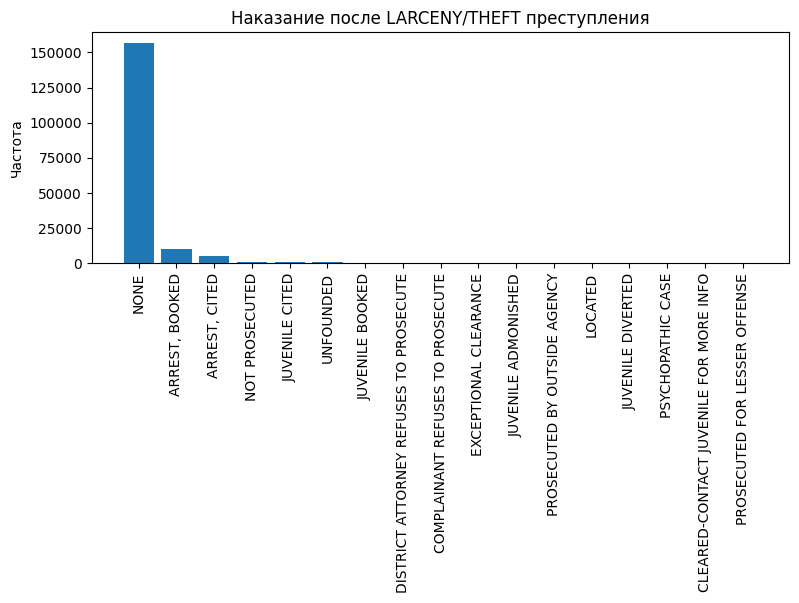

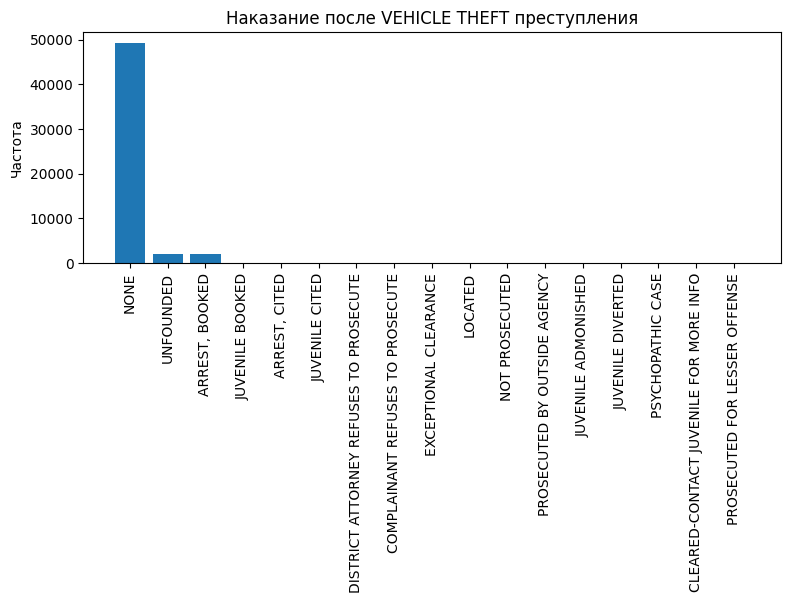

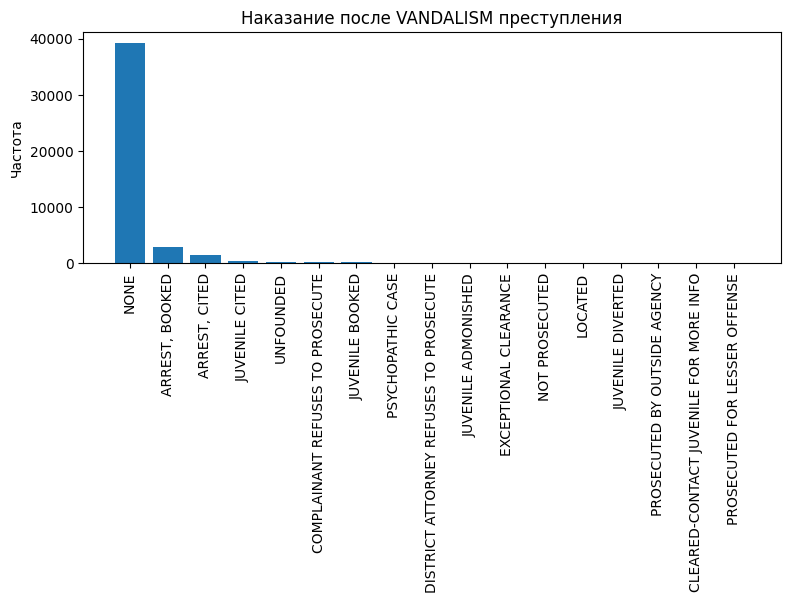

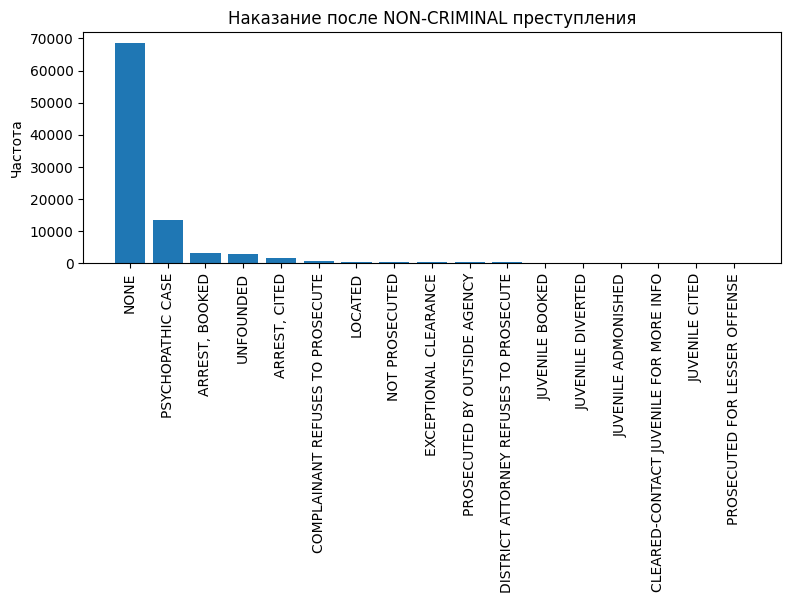

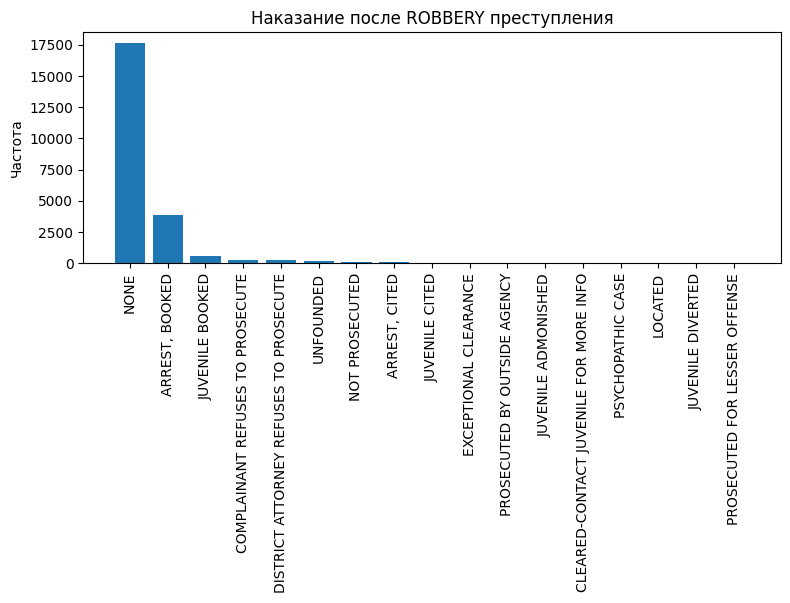

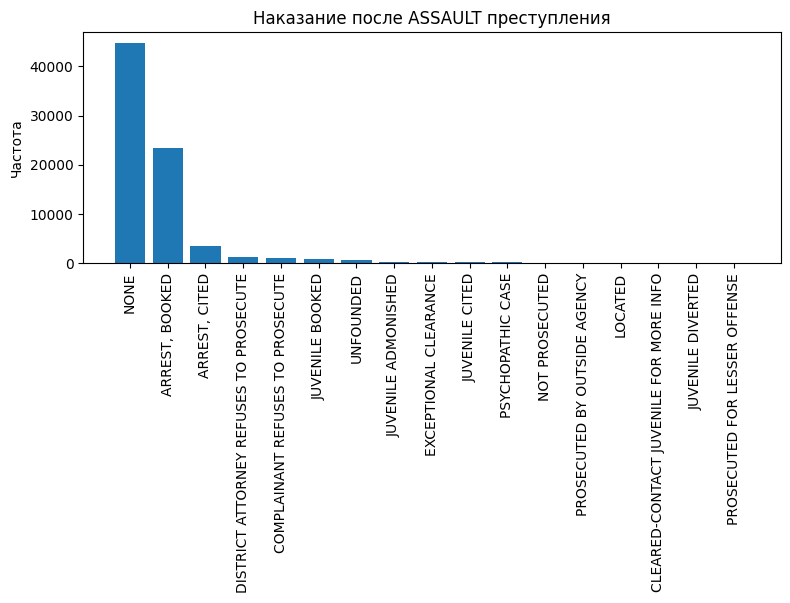

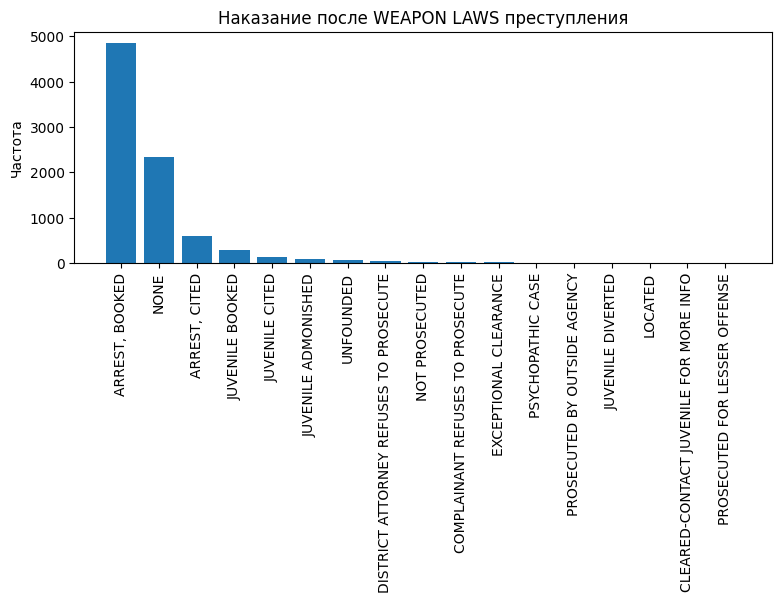

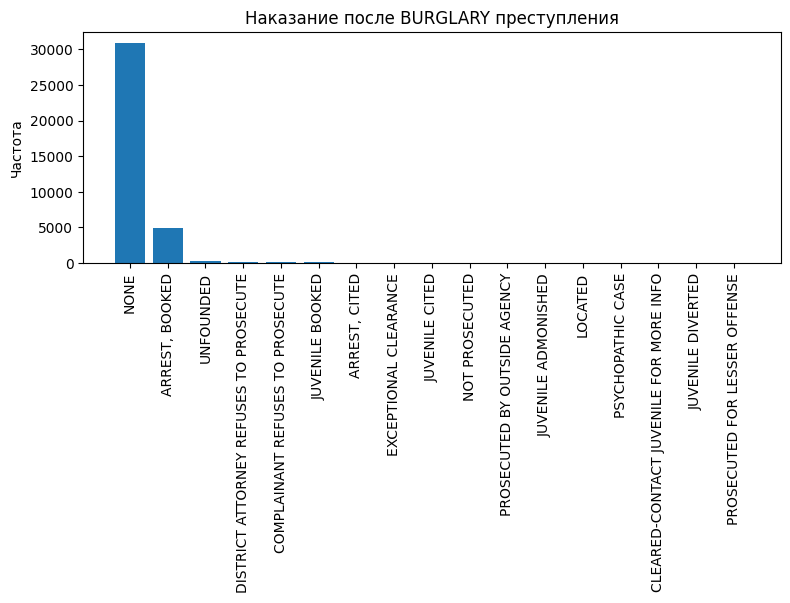

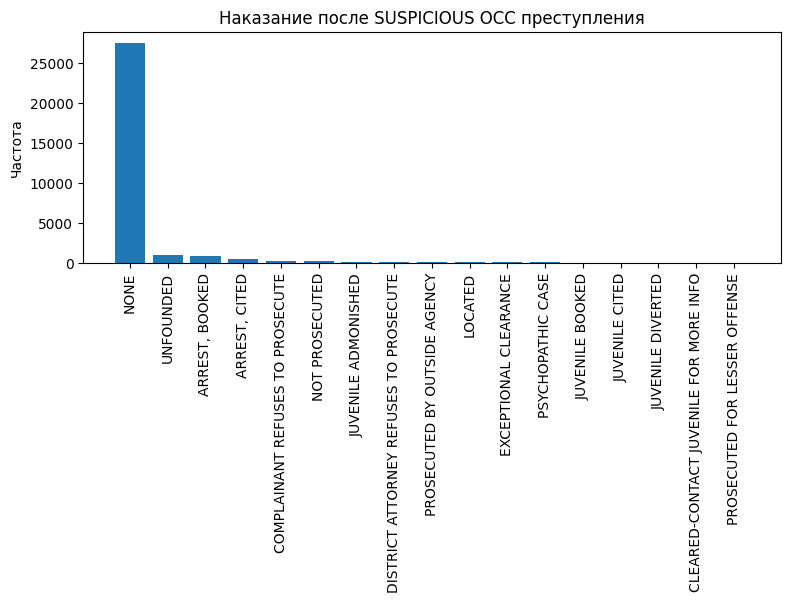

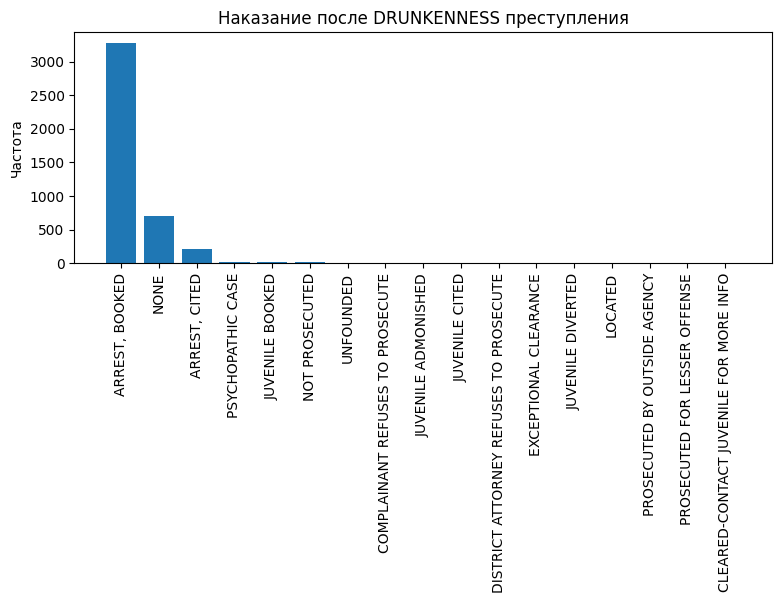

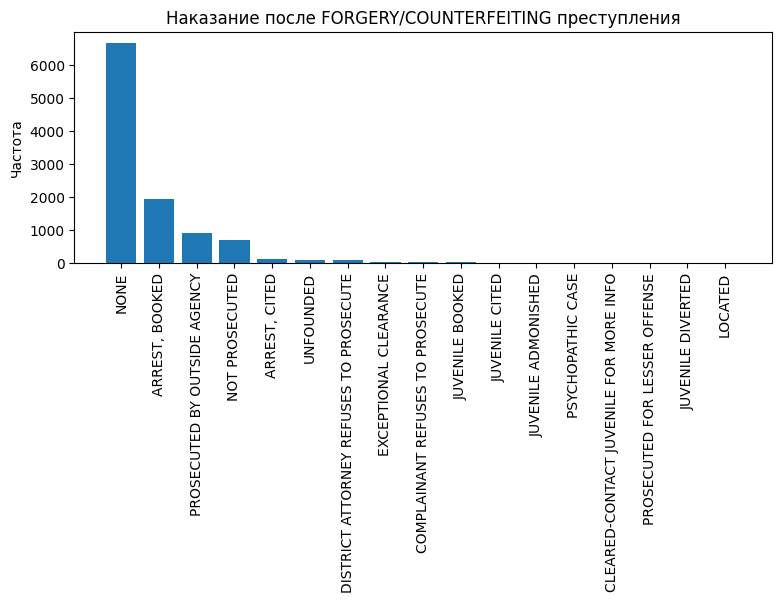

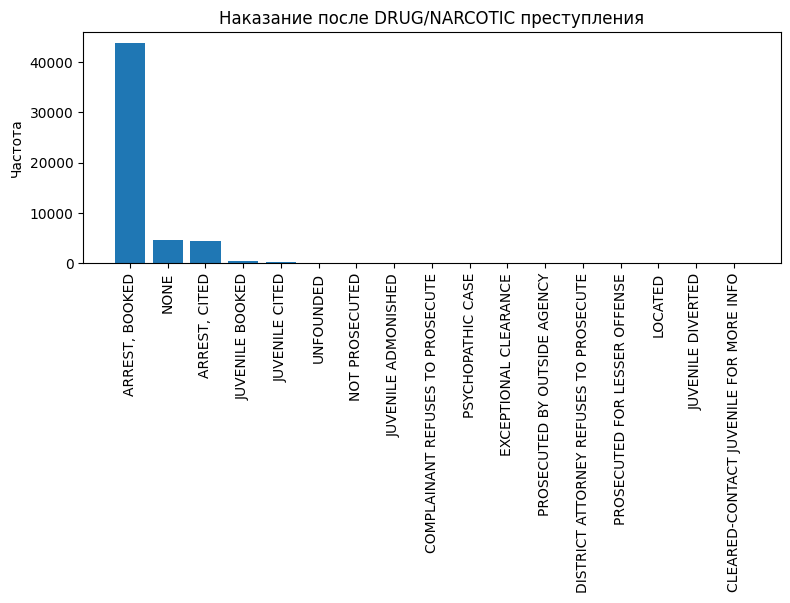

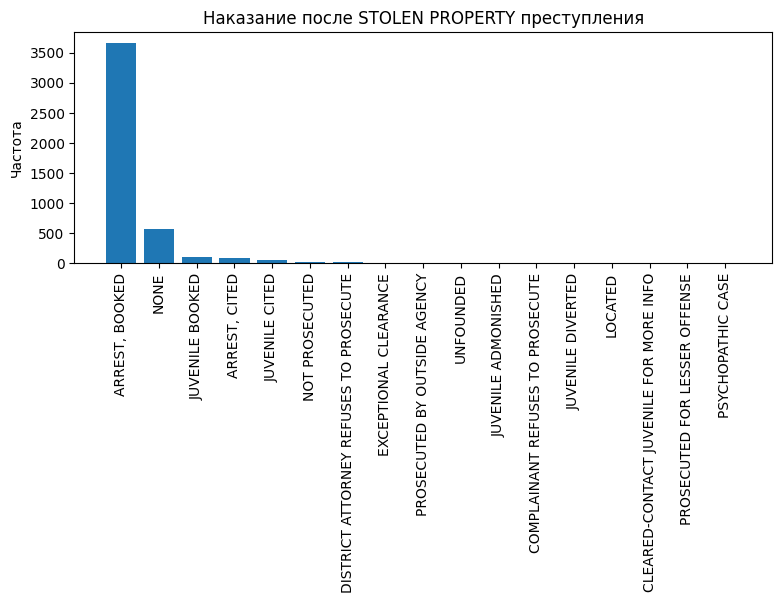

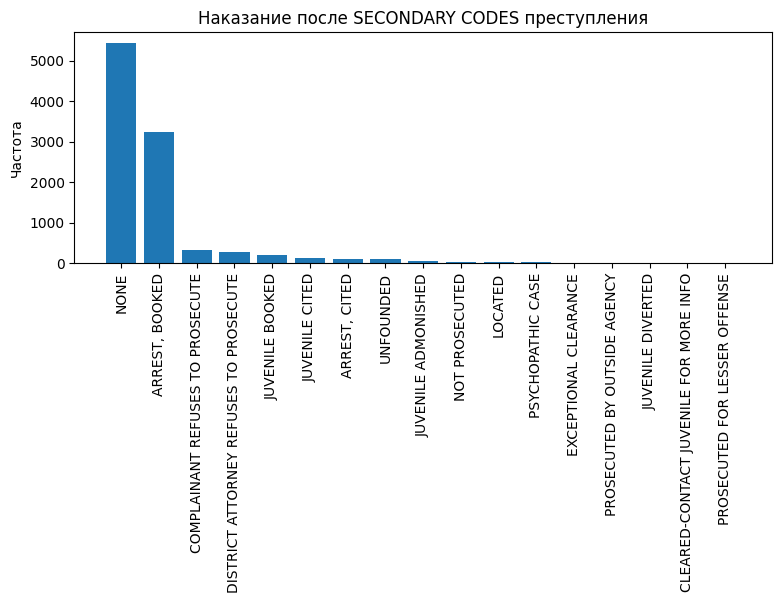

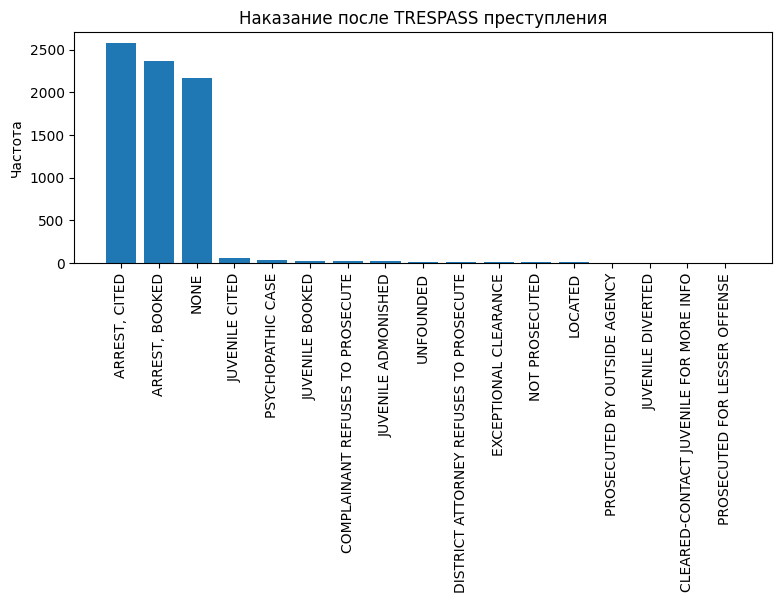

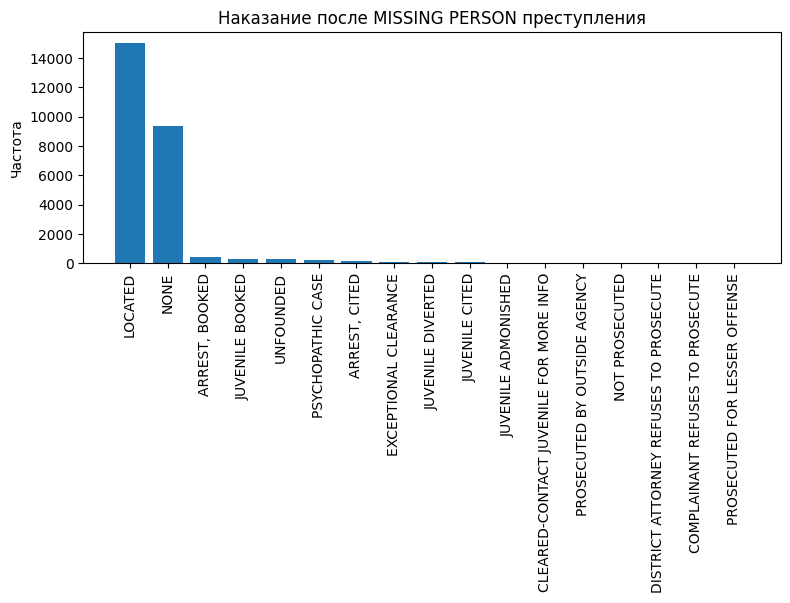

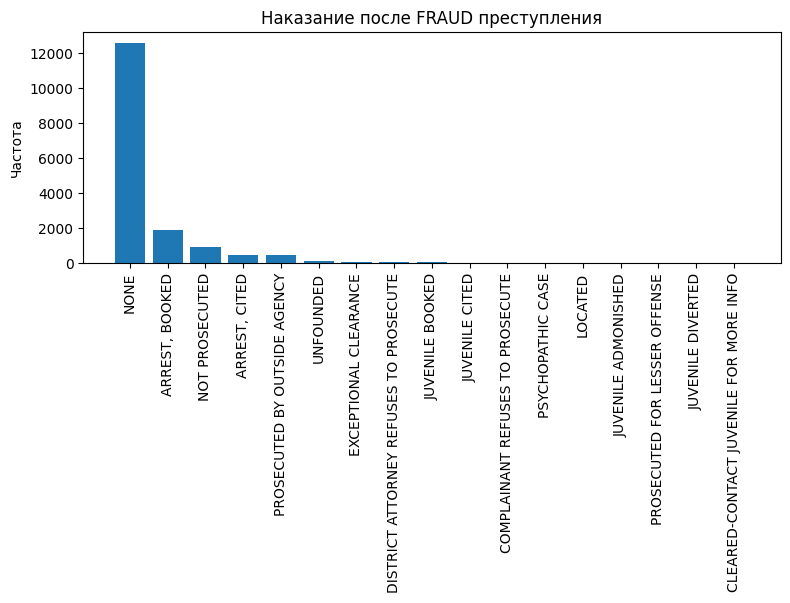

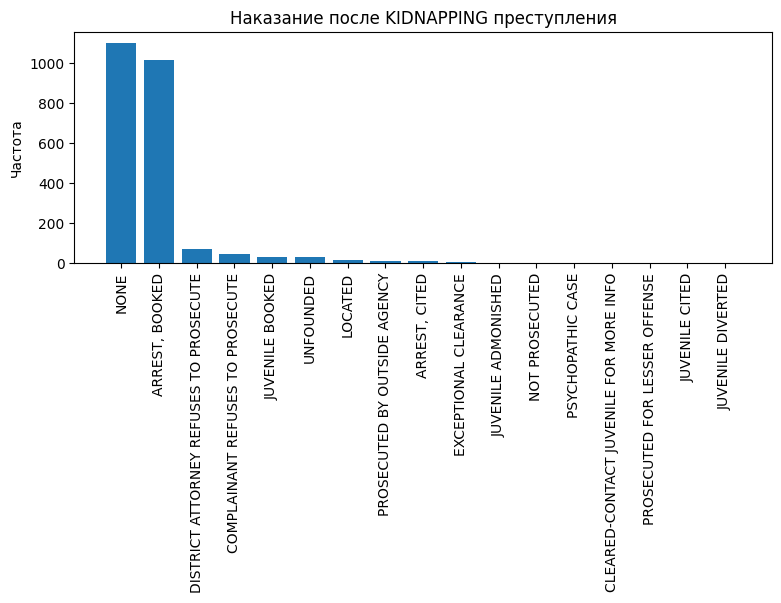

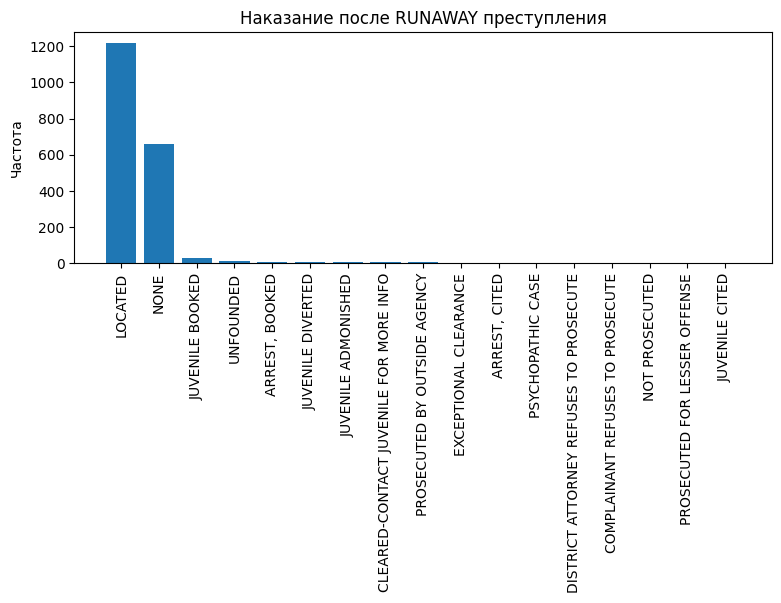

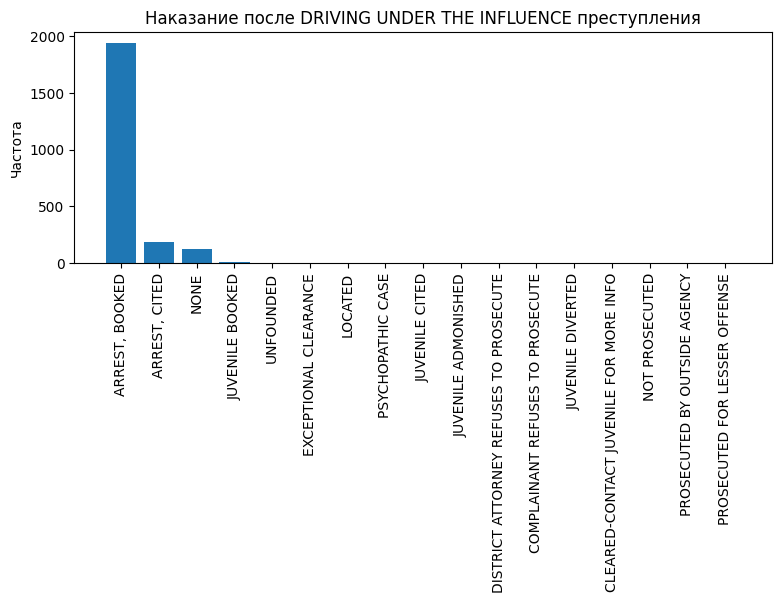

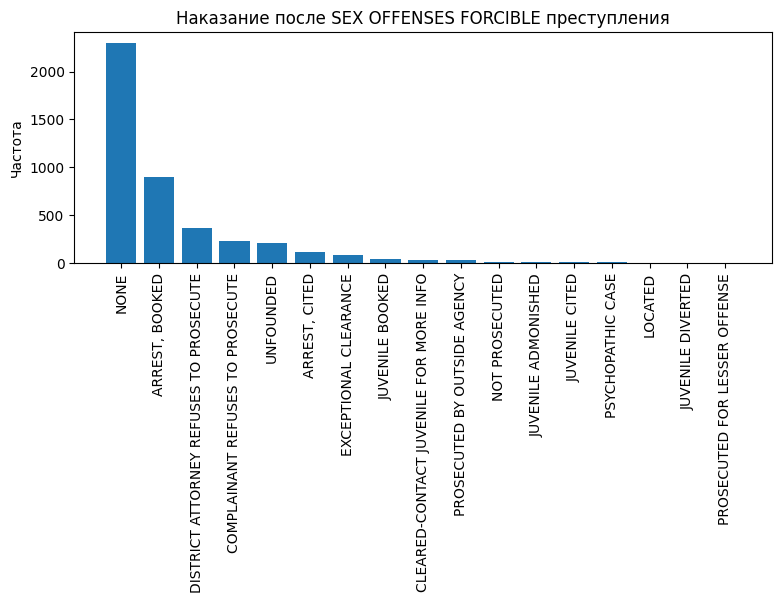

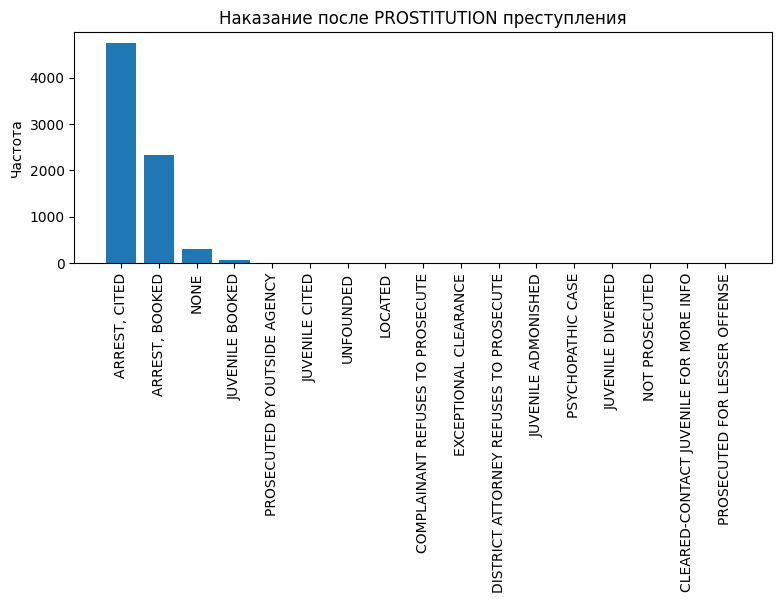

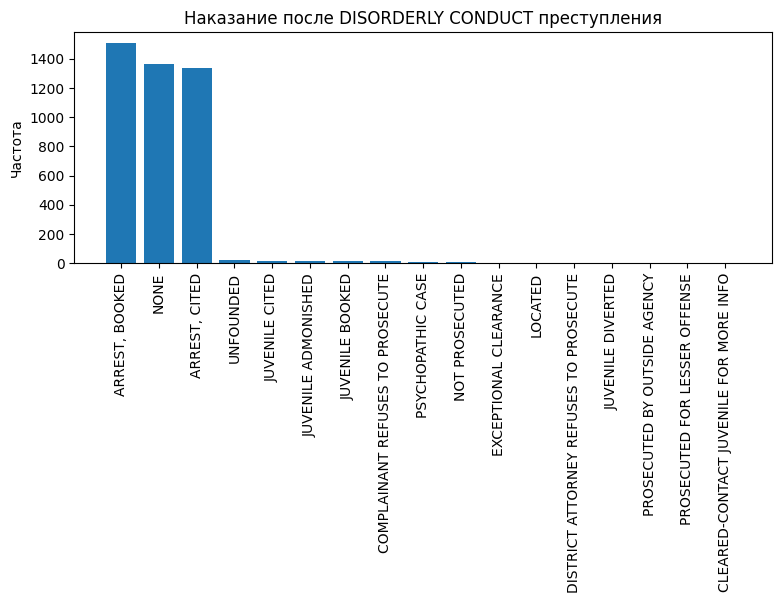

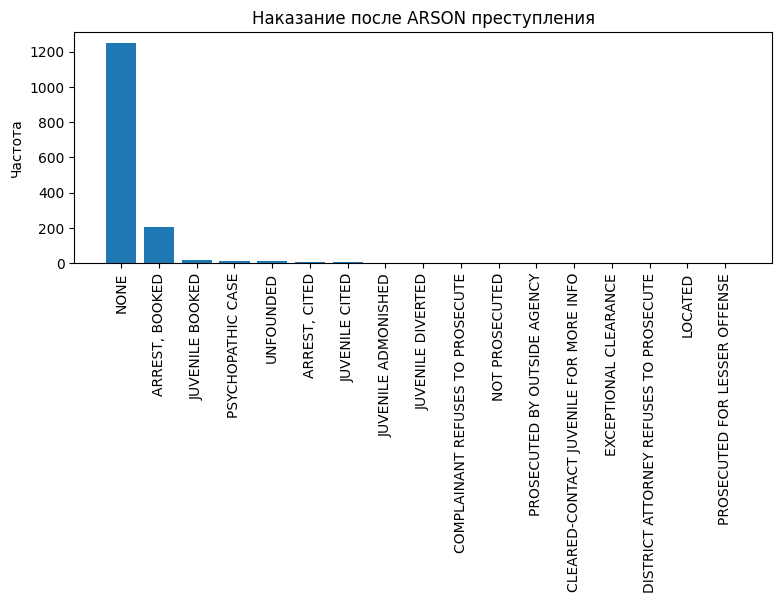

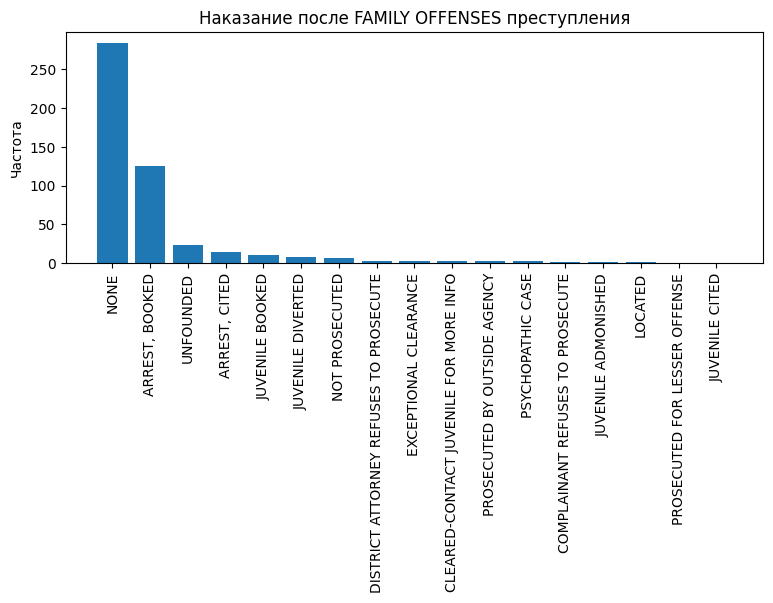

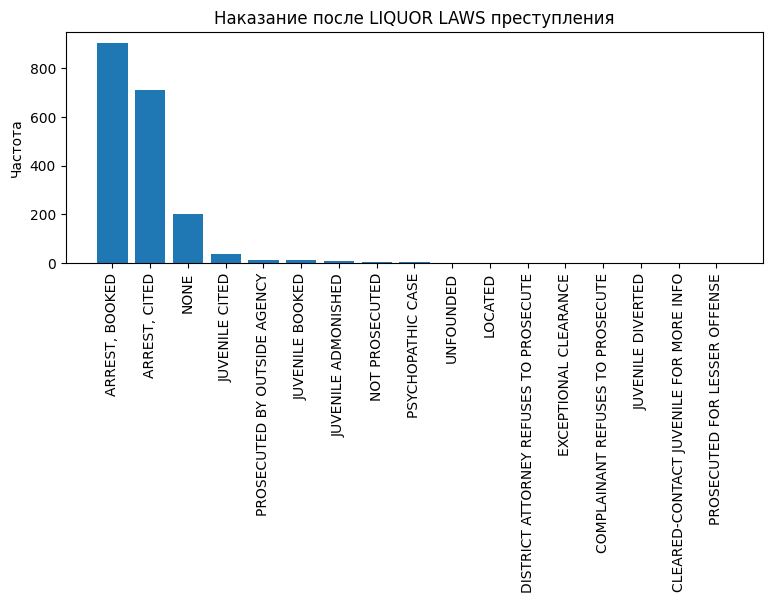

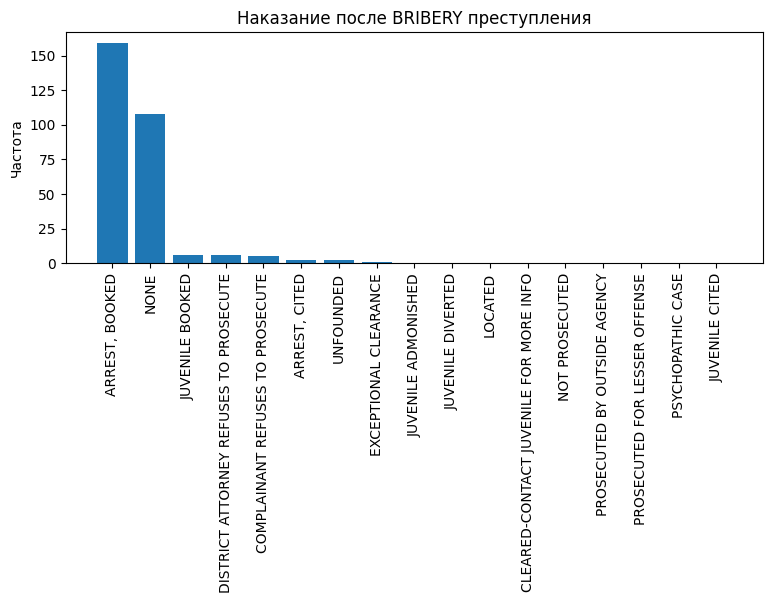

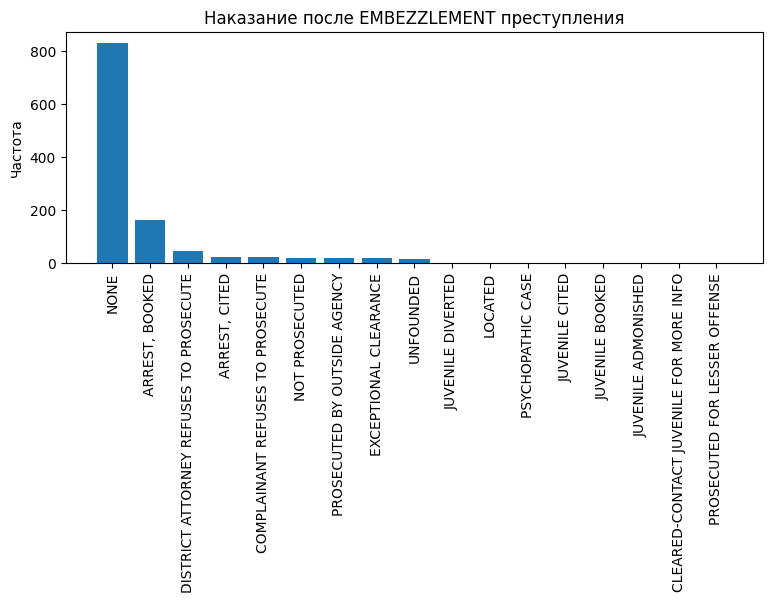

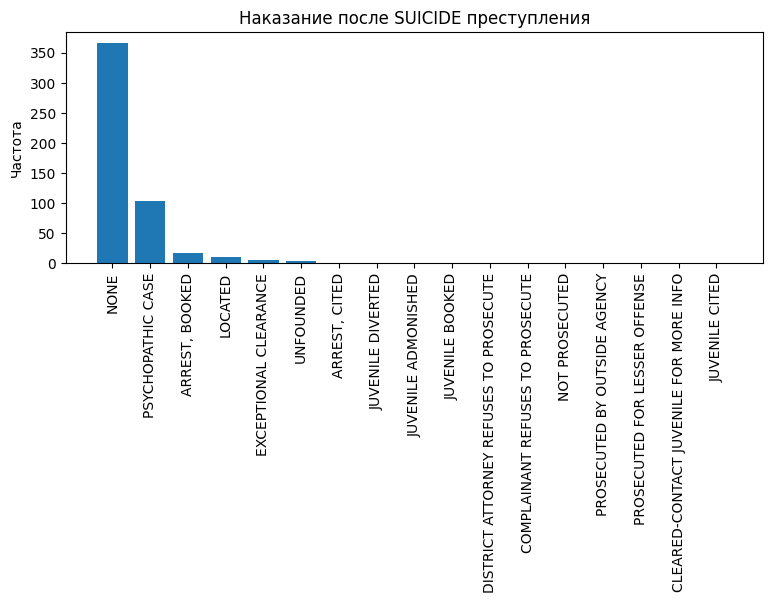

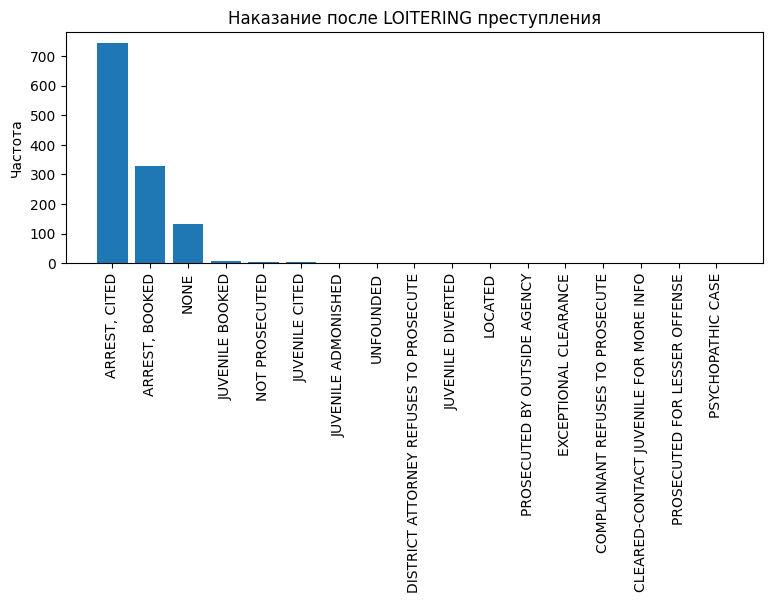

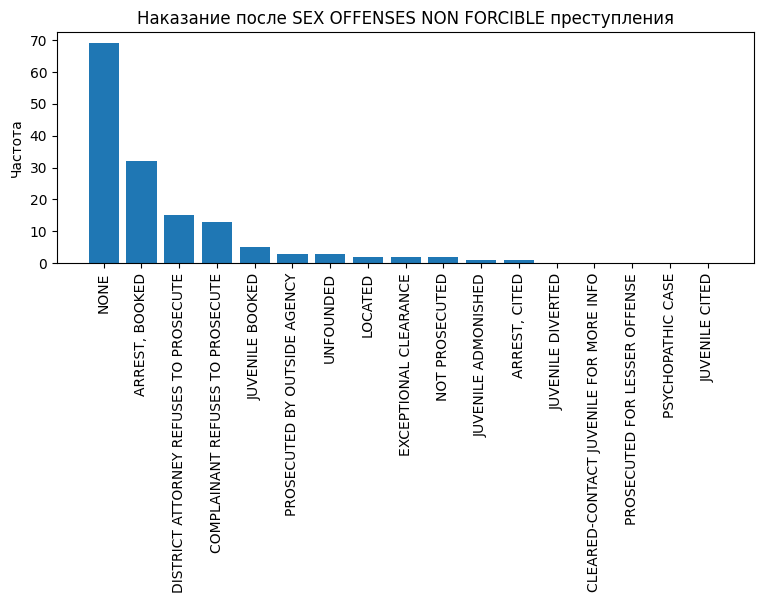

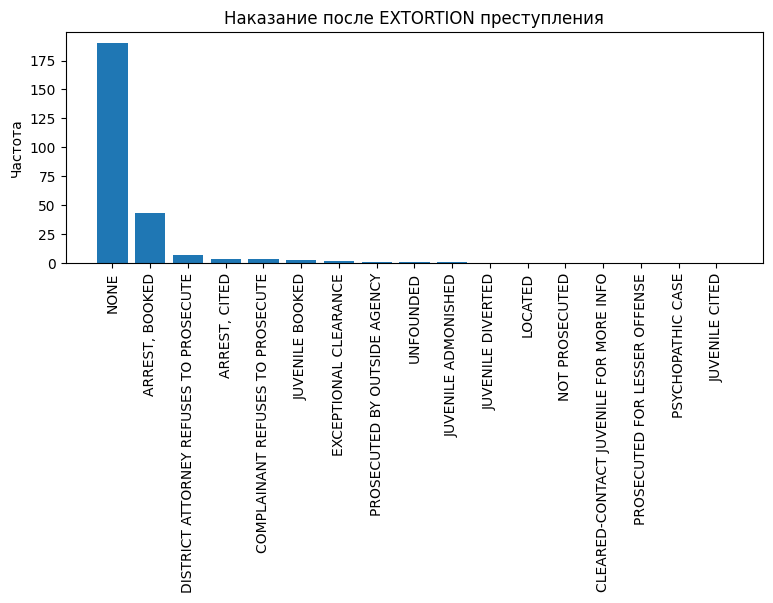

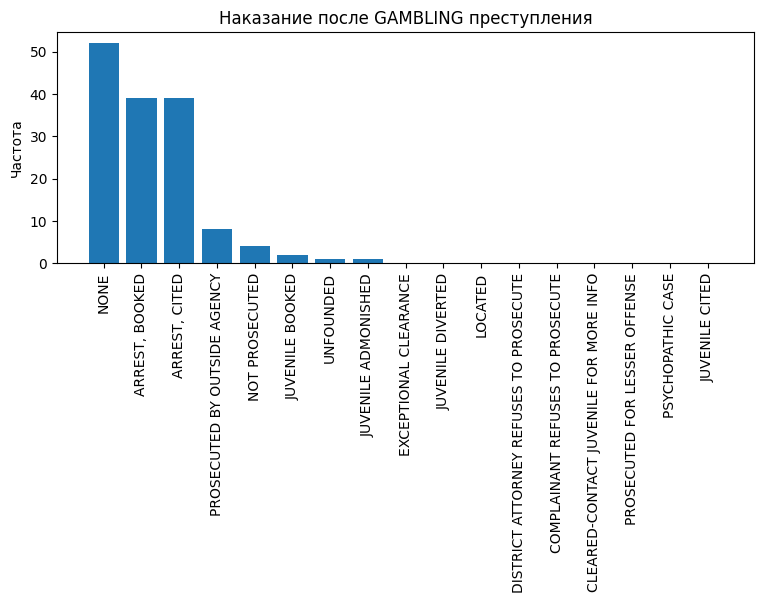

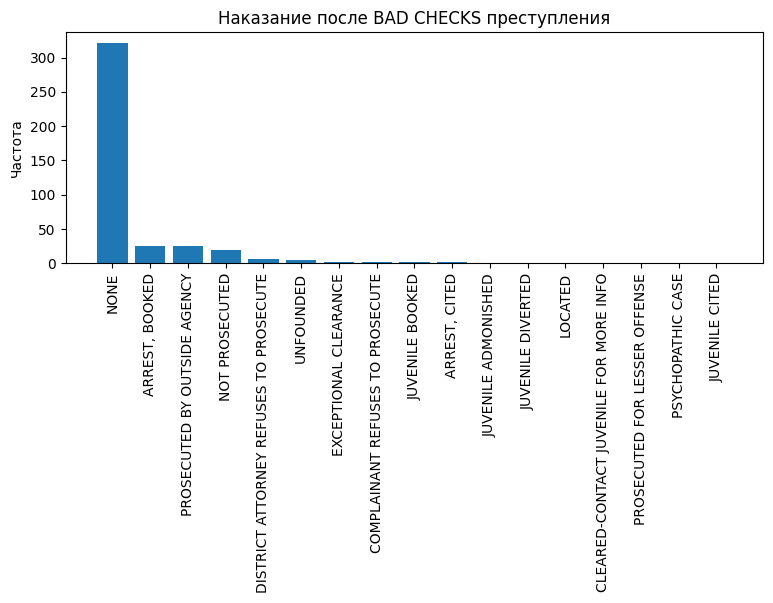

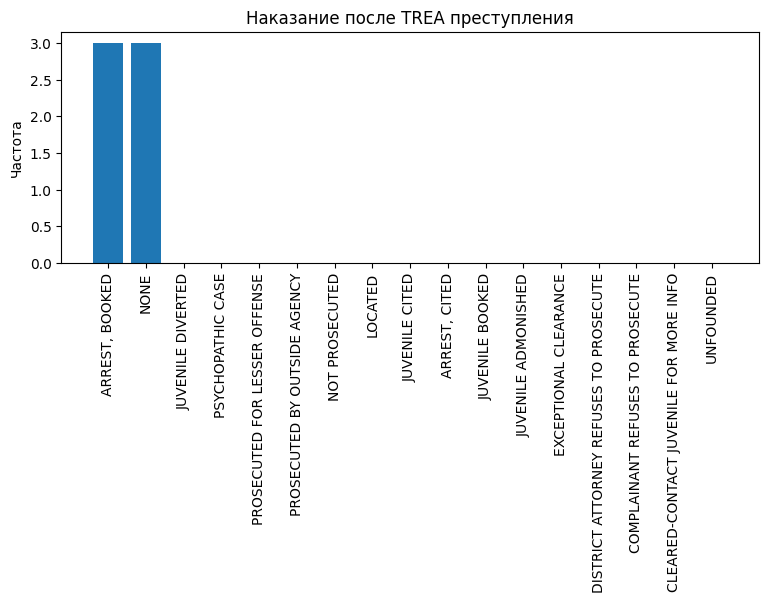

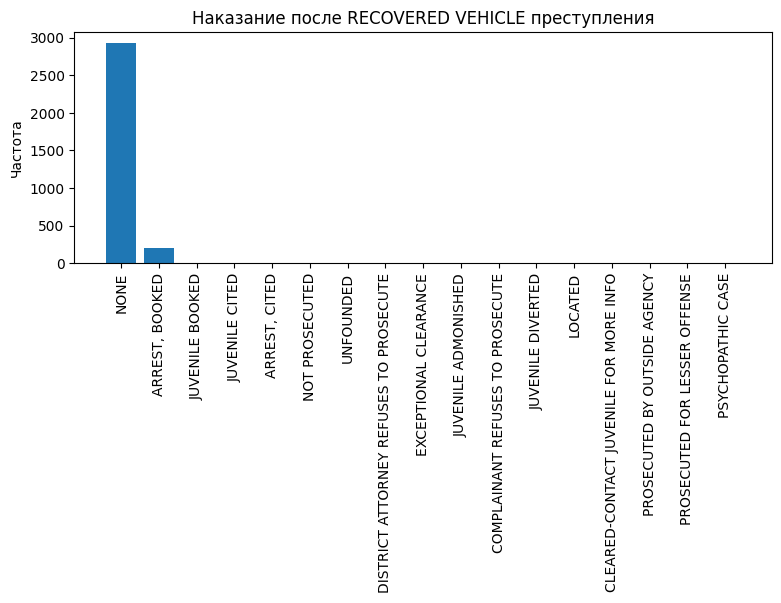

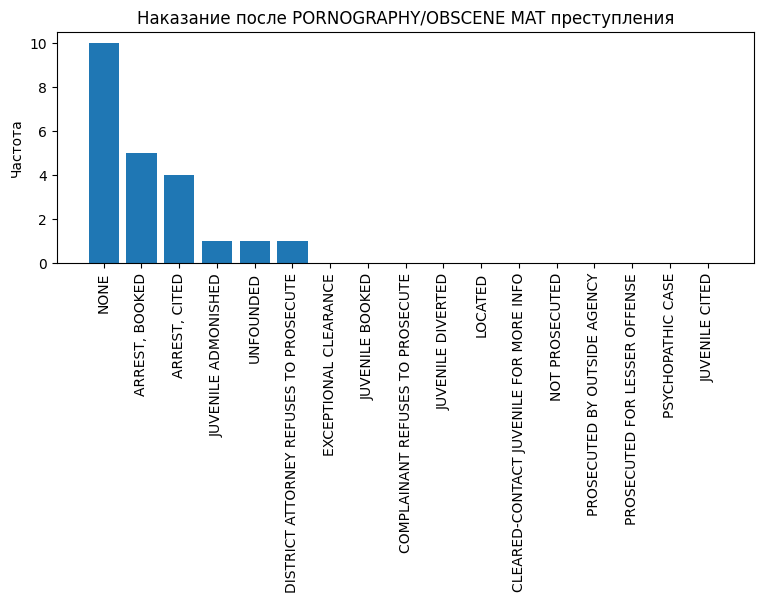

In [13]:
def count_plot(category_name):
    varValue=data[data["Category"]==category_name]["Resolution"].value_counts()

    #visualize
    pyplot.figure(figsize=(9,3))

    pyplot.bar(varValue.index,varValue)
    pyplot.xticks(varValue.index, varValue.index.values)
    pyplot.ylabel("Частота")
    pyplot.title("Наказание после {} преступления".format(category_name))
    pyplot.xticks(rotation=90)
    pyplot.show()

for i in list(data.Category.unique()):
    count_plot(i)

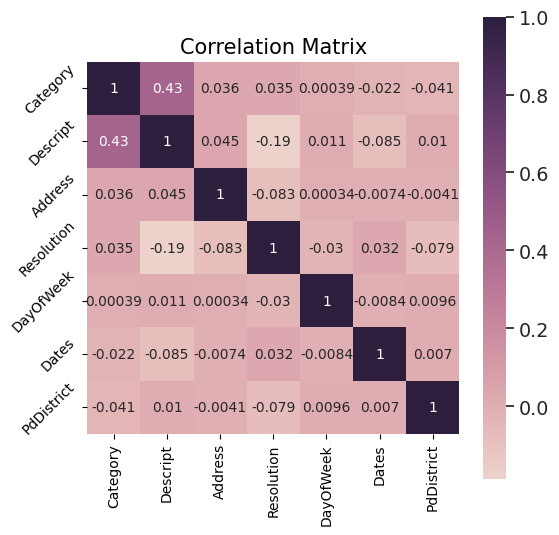

In [14]:
d = defaultdict(LabelEncoder)
sf_encode = data.apply(lambda x: d[x.name].fit_transform(x))
sf_encode = sf_encode.drop(['X', 'Y'], axis=1)

corrmat = sf_encode.corr()
f, ax = pyplot.subplots(figsize=(6, 6))


cmap1 = sns.cubehelix_palette(as_cmap=True)
k = 8
cols = corrmat.nlargest(k, 'Category')['Category'].index
cm = np.corrcoef(sf_encode[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True,cmap=cmap1, square=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm.axes.set_title('Correlation Matrix')
pyplot.xticks(rotation=90)
pyplot.yticks(rotation=45)
pyplot.show()

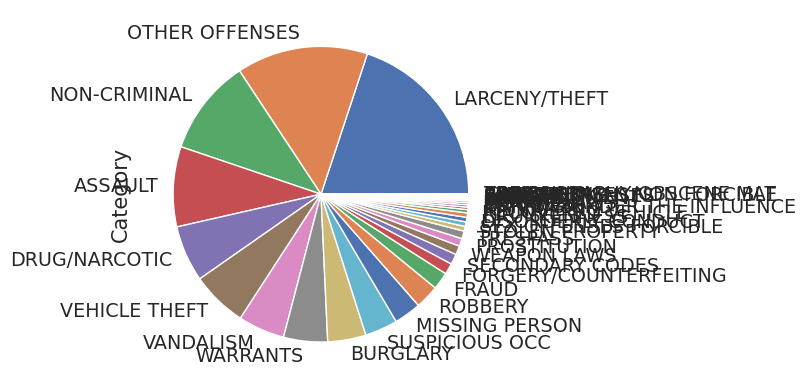

In [15]:
data["Category"].value_counts().plot.pie();

# Обработка категориальных признаков

Для всех объектов категориальный признак определён, пропущеных значений нет. Уменьшим количество классов, сделаем подходящие по смыслу в одну группу. Имеем следующие категории:

1. 'ARSON' (поджог),
2. 'ASSAULT' (нападение),
3. 'BAD CHECKS' (фальшивые чеки/подделка),
4. 'BRIBERY' (взяточничество),
5. 'BURGLARY' (кража со взломом),
6. 'DISORDERLY CONDUCT' (беспорядочное поведение),
7. 'DRIVING UNDER THE INFLUENCE' (вождение в нетрезвом виде),
8. 'DRUG/NARCOTIC' (наркотики),
9. 'DRUNKENNESS' (распитие),
10. 'EMBEZZLEMENT' (хращение, присвоение, хищение против собственности),
11. 'EXTORTION' (вымогательство),
12. 'FAMILY OFFENSES' (семейные преступления),
13. 'FORGERY/COUNTERFEITING' (фальш,контрафакция),
14. 'FRAUD' (мошенничество),
15. 'GAMBLING' (азартные игры),
16. 'KIDNAPPING' (похищение),
17. 'LARCENY/THEFT' (хищение, кража),
18. 'LIQUOR LAWS' (алкогольные законы),
19. 'LOITERING' (Праздношатание),
20. 'MISSING PERSON' (пропавший человек),
21. 'NON-CRIMINAL',
22. 'OTHER OFFENSES' (другие нарушения),
23. 'PORNOGRAPHY/OBSCENE MAT',
24. 'PROSTITUTION',
25. 'RECOVERED VEHICLE' (восст. тс),
26. 'ROBBERY' (ограбление),
27. 'RUNAWAY' (побег),
28. 'SECONDARY CODES' (вторичные коды),
29. 'SEX OFFENSES FORCIBLE',
30. 'SEX OFFENSES NON FORCIBLE',
31. 'STOLEN PROPERTY' (украденное имущество),
32. 'SUICIDE',
33. 'SUSPICIOUS OCC' (подозрительный случай),
34. 'TREA',
35. 'TRESPASS' (нарушение границ, вторжение),
36. 'VANDALISM' (вандализм),
37. 'VEHICLE THEFT' (угон тс),
38. 'WARRANTS' (ордера),
39. 'WEAPON LAWS' (законы об оружии)

ПЕРВАЯ КАТЕГОРИЯ:
Non-Criminal

ВТОРАЯ КАТЕГОРИЯ:

ТРЕТЬЯ КАТЕГОРИЯ:

ЧЕТВЕРТАЯ КАТЕГОРИЯ:

ПЯТАЯ КАТЕГОРИЯ:

# Нормализация количественных признаков

In [16]:
#normalization = [i for i in data.columns if i != 'Category' and i != 'Descript' and i != 'Resolution']
#data_normal = (data[normalization] - data[normalization].mean(axis = 0))/data[normalization].std(axis = 0)
#data_normal.describe()



# Разбиение на обучающую и тестовую выборку

# Классификация. Метод k ближайших соседей. Подбор параметра k.

# Вычисление ошибок на обучающей и тестовой выборках

# Выводы